# 178 ML Project
#### By: Edward

In [121]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mltools as ml
import seaborn as sns

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [122]:
np.random.seed(0)

In [123]:
source = 'winequality-red.csv'
red = np.genfromtxt(source, delimiter=";", skip_header=1)
wine = pd.read_csv(source, delimiter=";")

In [124]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [125]:
X = red[:, 0:11]
Y = red[:, -1]

In [126]:
source = 'winequality-white.csv'
white = np.genfromtxt(source, delimiter=";", skip_header=1)

In [127]:
X2 = white[:, 0:11]
Y2 = white[:, -1]

In [128]:
X, Y = ml.shuffleData(X, Y)
X2, Y2 = ml.shuffleData(X2, Y2)

In [129]:
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)

In [130]:
XtrS, params  = ml.rescale(Xtr)    # Normalize the features
XvaS, _  = ml.rescale(Xva, params)

In [131]:
Xtr2, Xva2, Ytr2, Yva2 = ml.splitData(X2, Y2)

In [132]:
XtrS2, params2  = ml.rescale(Xtr2)    # Normalize the features
XvaS2, _  = ml.rescale(Xva2, params2)

Looking at the shape

In [10]:
print(X.shape)
print(X2.shape)
print(Y.shape)
print(Y2.shape)

(1599, 11)
(4898, 11)
(1599,)
(4898,)


Pair Plot

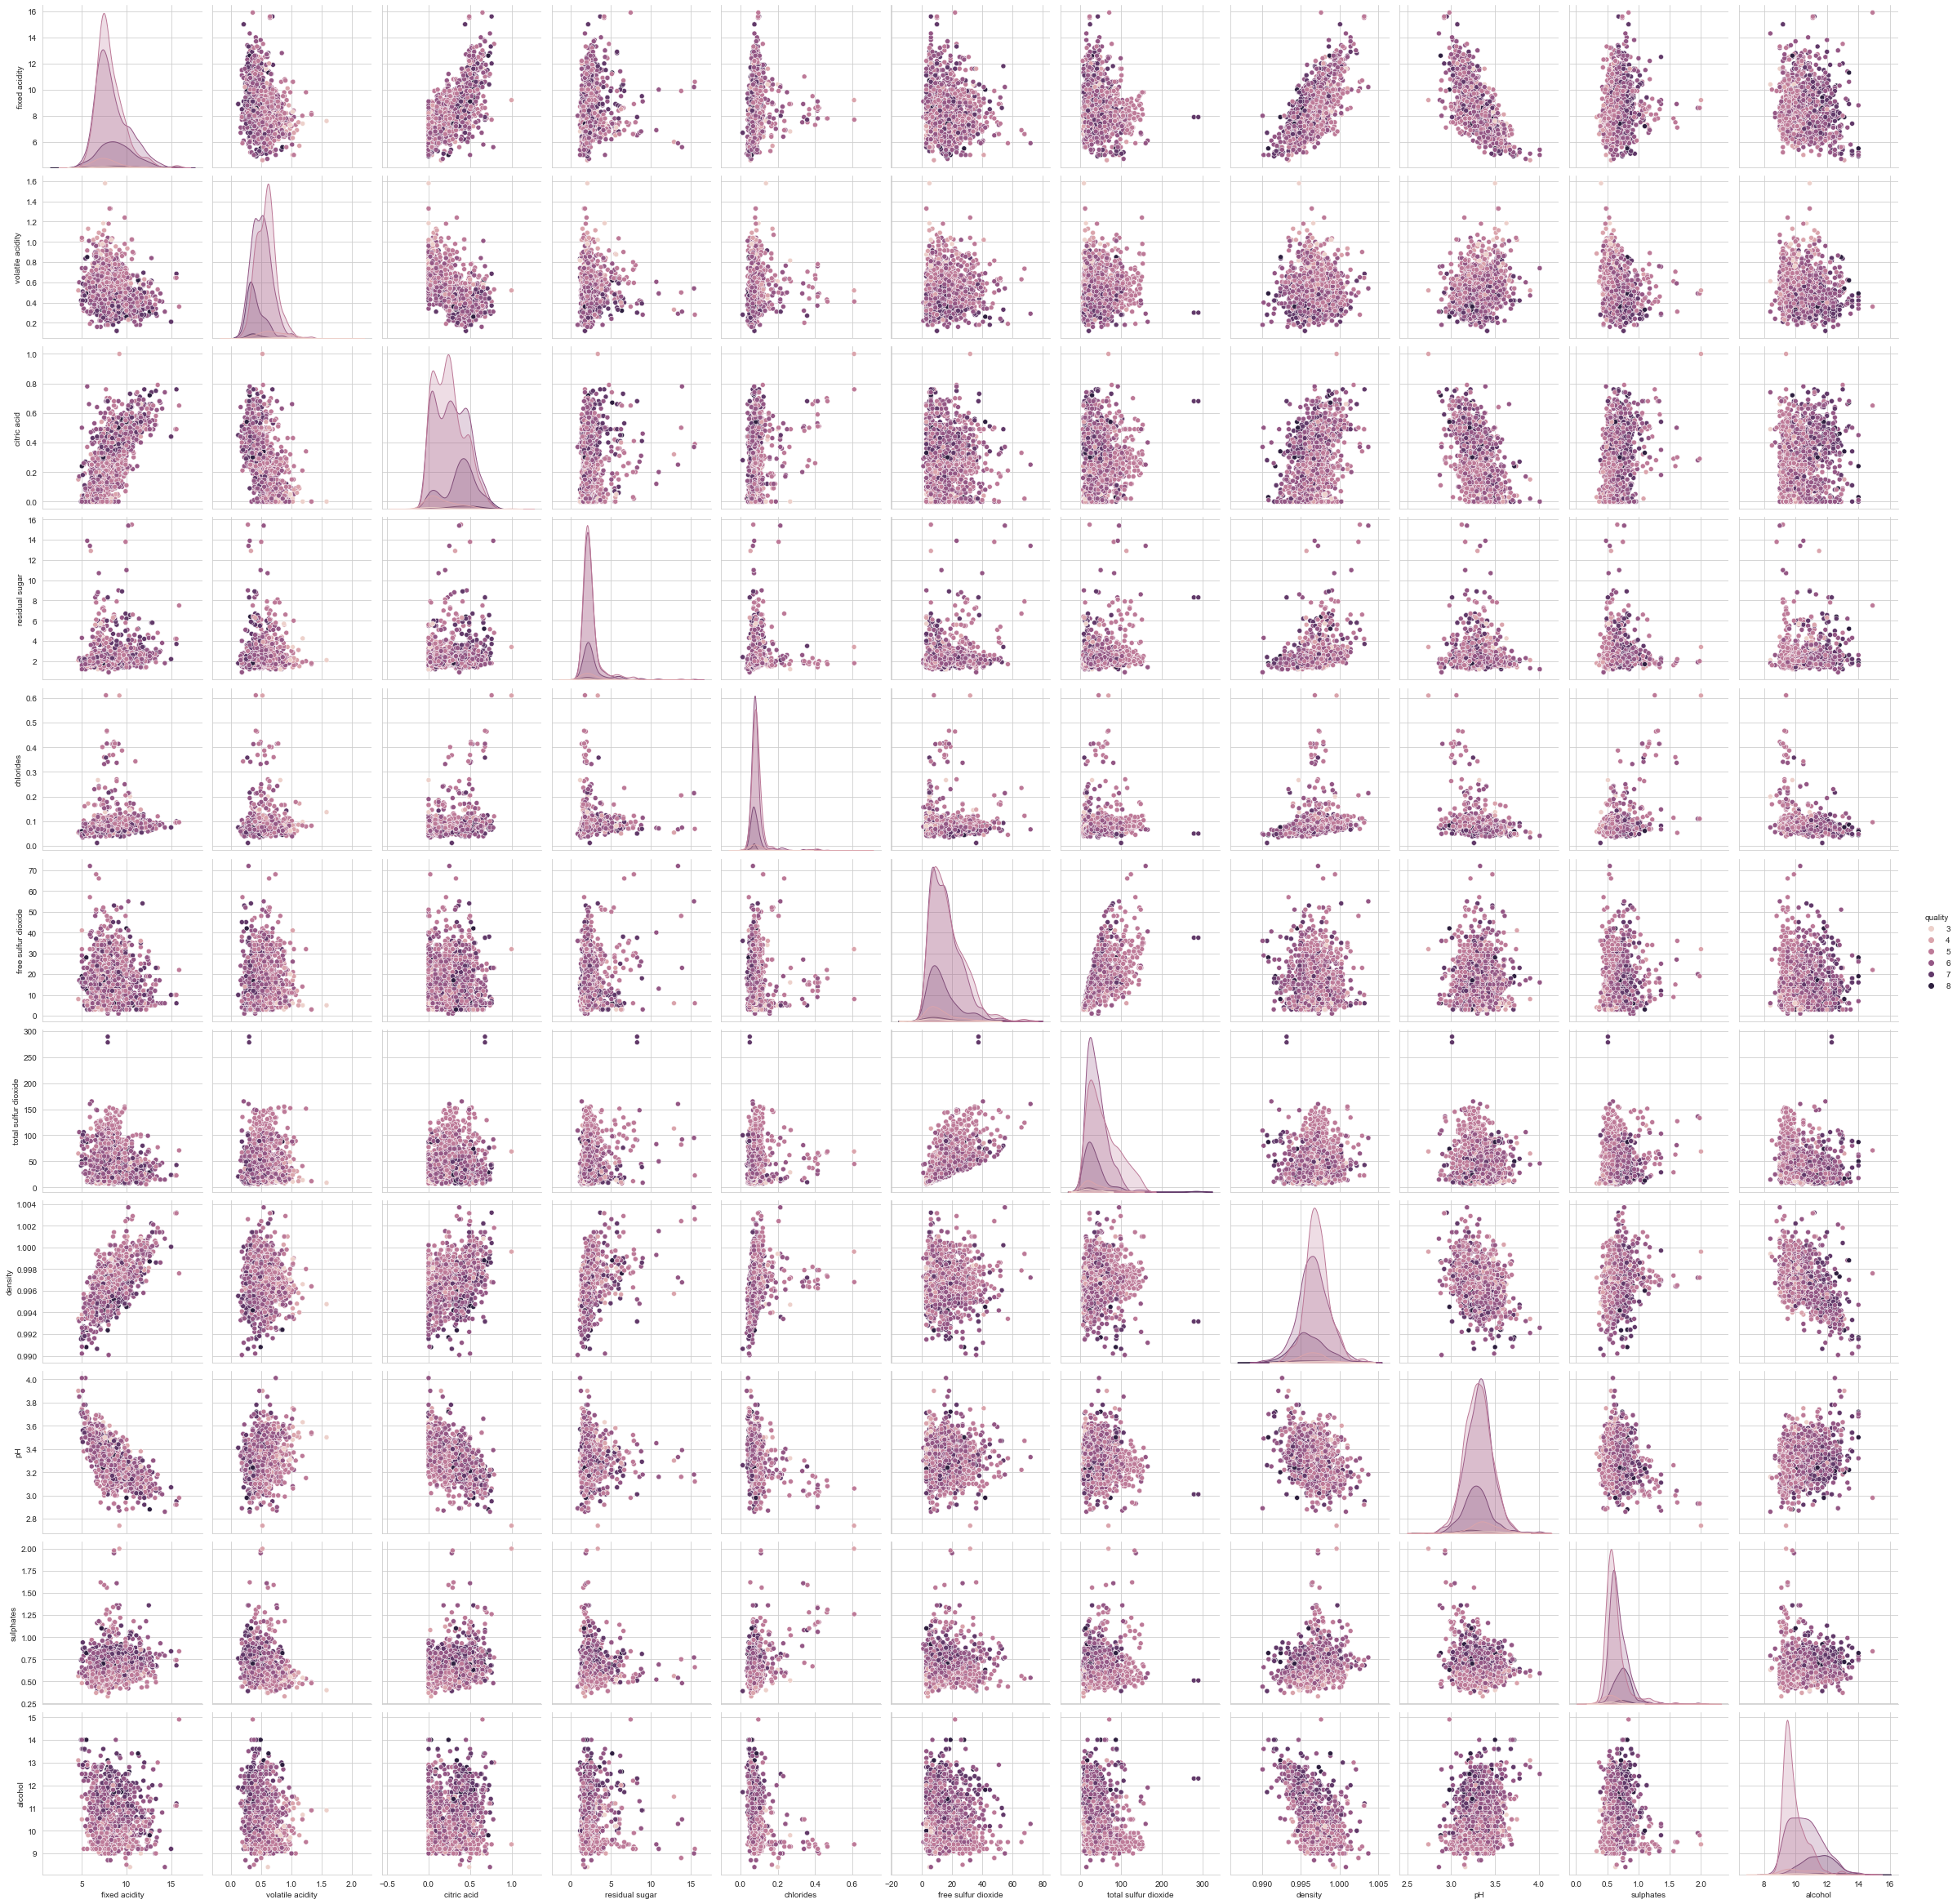

In [13]:
sns.set_palette(sns.color_palette("husl", 12))
sns.set_style("whitegrid");
sns.pairplot(wine, hue="quality", height=3);
plt.show()

## Using Support Vector Machine for Classifiers

#### Varying the Kernel...

In [185]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

for kernel in kernels:
    svc = None
    if kernel == 'poly':
        svc = SVC(kernel=kernel, degree=3,  C=1, decision_function_shape='ovo')
    if kernel == 'rbf':
        svc = SVC(kernel=kernel, gamma=1,  C=1, decision_function_shape='ovo')
    else: 
        svc = SVC(kernel=kernel, C=1, decision_function_shape='ovo')
    
    svc.fit(XtrS, Ytr)
    Yhat = svc.predict(XvaS)
    mse = np.mean( (Yva - Yhat.reshape(Yva.shape))**2 , axis=0)
    print("MSE of "+ kernel +": "+ str(mse))

MSE of linear: 0.50625
MSE of rbf: 0.453125
MSE of poly: 0.46875
MSE of sigmoid: 0.625


#### Varying the gamma...

In [194]:
gammas = [0.1, 1, 10, 100]

for gamma in gammas:
    svc = SVC(kernel='rbf', gamma=gamma, decision_function_shape='ovo')
    svc.fit(XtrS, Ytr)
    Yhat = svc.predict(XvaS)
    mse = np.mean( (Yva - Yhat.reshape(Yva.shape))**2 , axis=0)
    print("MSE of gamma="+ str(gamma) +" : "+ str(mse))

MSE of gamma=0.1 : 0.45
MSE of gamma=1 : 0.453125
MSE of gamma=10 : 0.78125
MSE of gamma=100 : 0.825


#### Varying the C...

In [195]:
cs = [0.1, 1, 10, 100, 1000]
for c in cs:
    svc = SVC(kernel='rbf', C=c, decision_function_shape='ovo')
    svc.fit(XtrS, Ytr)
    Yhat = svc.predict(XvaS)
    mse = np.mean( (Yva - Yhat.reshape(Yva.shape))**2 , axis=0)
    print("MSE of Cs="+ str(c) +" : "+ str(mse))

MSE of Cs=0.1 : 0.53125
MSE of Cs=1 : 0.45625
MSE of Cs=10 : 0.5875
MSE of Cs=100 : 0.571875
MSE of Cs=1000 : 0.596875


#### Varying the degree...

In [196]:
degrees = [0, 1, 2, 3, 4, 5, 6]
for degree in degrees:
    svc = SVC(kernel='poly', degree=degree, decision_function_shape='ovo')
    svc.fit(XtrS, Ytr)
    Yhat = svc.predict(XvaS)
    mse = np.mean( (Yva - Yhat.reshape(Yva.shape))**2 , axis=0)
    print("MSE of degree="+ str(degree) +" : "+ str(mse))

MSE of degree=0 : 1.0875
MSE of degree=1 : 0.515625
MSE of degree=2 : 0.68125
MSE of degree=3 : 0.46875
MSE of degree=4 : 0.621875
MSE of degree=5 : 0.56875
MSE of degree=6 : 0.809375


### Using optimized parameters

In [199]:
svc = SVC(kernel='rbf', gamma=0.1, C=1, decision_function_shape='ovo')
svc.fit(XtrS, Ytr)
Yhat = svc.predict(XvaS)
mse = np.mean( (Yva - Yhat.reshape(Yva.shape))**2 , axis=0)
print(mse)

0.45


## Random Forest Classifier

In [89]:
clf = RandomForestClassifier(max_depth=2, random_state=0, max_samples=100)
clf.fit(XtrS, Ytr)
Yhat = clf.predict(XvaS)
mse = np.mean( (Yva - Yhat.reshape(Yva.shape))**2 , axis=0)
print(mse)
clf.score(X, Y)

0.509375


0.40212632895559725

Things to vary: n_estimators, max_depth, criterion(gini, entropy), min_samples_split, min_samples_leaf

### Entropy or gini split...?


In [106]:
criterion = ["gini", "entropy"]
mses = []
for n in criterion:
    clf = RandomForestClassifier(criterion=n)
    clf.fit(XtrS, Ytr)
    Yhat = clf.predict(XvaS)
    mse = np.mean( (Yva - Yhat.reshape(Yva.shape))**2 , axis=0)
    mses.append(mse)

In [108]:
print(mses)

[0.38125, 0.3625]


criterion="entropy" produces lower mse

### Varying max_samples...

In [110]:
max_samples = [100, 300, 500, 750, 800, 1200]
mses = []
for n in max_samples:
    clf = RandomForestClassifier(max_samples=n)
    clf.fit(XtrS, Ytr)
    Yhat = clf.predict(XvaS)
    mse = np.mean( (Yva - Yhat.reshape(Yva.shape))**2 , axis=0)
    mses.append(mse)

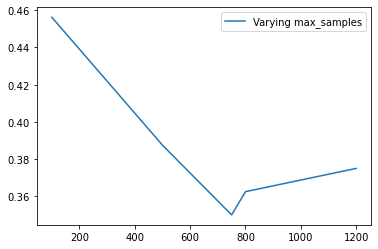

In [113]:
plt.plot(max_samples, mses, label="Varying max_samples")
plt.legend()
plt.show()

max_samples=750 would produce best mse

### Varying n_estimators...

In [90]:
n_estimators = [100, 300, 500, 750, 800, 1200]
mses = []

for i, n in enumerate(n_estimators):
    clf = RandomForestClassifier(n_estimators=n)
    clf.fit(XtrS, Ytr)
    Yhat = clf.predict(XvaS)
    mse = np.mean( (Yva - Yhat.reshape(Yva.shape))**2 , axis=0)
    mses.append(mse)

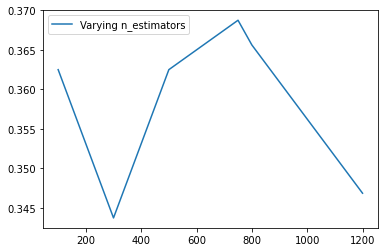

In [91]:
plt.plot(n_estimators, mses, label="Varying n_estimators")
plt.legend()
plt.show()

Based of the mses, it looks like n_estimator=300 would optimize our model.

### Varying max_depth...

In [92]:
max_depth = [1, 2, 5, 10, 15, 20, 25, 30]
mses = []

for i, n in enumerate(max_depth):
    clf = RandomForestClassifier(max_depth=n)
    clf.fit(XtrS, Ytr)
    Yhat = clf.predict(XvaS)
    mse = np.mean( (Yva - Yhat.reshape(Yva.shape))**2 , axis=0)
    mses.append(mse)

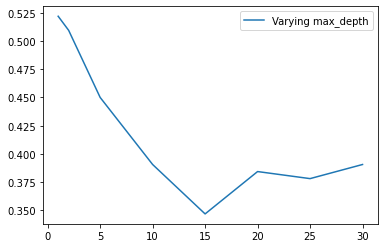

In [93]:
plt.plot(max_depth, mses, label="Varying max_depth")
plt.legend()
plt.show()

The max_depth=15 produces the lowest mse.

### Varying min_samples_split...

In [97]:
min_samples_split = [2, 5, 10, 15, 20, 25, 30]
mses = []

for i, n in enumerate(min_samples_split):
    clf = RandomForestClassifier(min_samples_split=n)
    clf.fit(XtrS, Ytr)
    Yhat = clf.predict(XvaS)
    mse = np.mean( (Yva - Yhat.reshape(Yva.shape))**2 , axis=0)
    mses.append(mse)

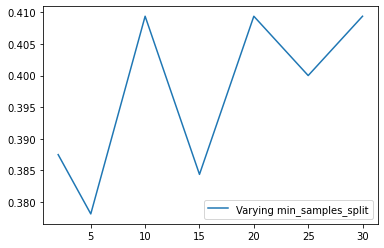

In [98]:
plt.plot(min_samples_split, mses, label="Varying min_samples_split")
plt.legend()
plt.show()

min_samples_split=5 minimizes mse

### Varying min_samples_leaf...

In [99]:
min_samples_leaf = range(1,11)
mses = []

for i, n in enumerate(min_samples_leaf):
    clf = RandomForestClassifier(min_samples_leaf=n)
    clf.fit(XtrS, Ytr)
    Yhat = clf.predict(XvaS)
    mse = np.mean( (Yva - Yhat.reshape(Yva.shape))**2 , axis=0)
    mses.append(mse)

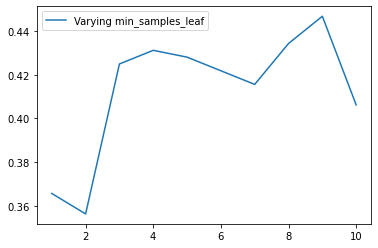

In [100]:
plt.plot(min_samples_leaf, mses, label="Varying min_samples_leaf")
plt.legend()
plt.show()

min_samples_leaf=2 minimizes mse

### Using GridSearchCV to determine hyperparams

In [251]:
max_samples = [100, 300, 500, 750, 800, 1200]
n_estimators = [100, 300, 500, 750, 800, 1200]
max_depth = [1, 2, 5, 10, 15, 20, 25, 30]
min_samples_split = [2, 5, 10, 15, 20, 25, 30]
min_samples_leaf = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 

forest = RandomForestClassifier(random_state=0)
#creates a dictionary for each of the hyperparam
hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, n_jobs = -1)
bestF = gridF.fit(XtrS, Ytr)

Fitting 3 folds for each of 3360 candidates, totalling 10080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 8426 tasks      | elapsed: 34.6min
[Parallel(n_jobs=-1)]: Done 9776 tasks      | elapsed: 42.3min
[Parallel(n_jobs=-1)]: Done 10080 out of 1008

In [253]:
bestF.get_params()

{'cv': 3,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': 0,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(random_state=0),
 'iid': 'deprecated',
 'n_jobs': -1,
 'param_grid': {'n_estimators': [100, 300, 500, 750, 800, 1200],
  'max_depth': [1, 2, 5, 10, 15, 20, 25, 30],
  'min_samples_split': [2, 5, 10, 15, 20, 25, 30],
  'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
 'pre_dispatch'

### Model with adjusted hyperparameters

In [12]:
clf = RandomForestClassifier(criterion="entropy", max_samples=750, n_estimators=300, max_depth=15, min_samples_split=5, min_samples_leaf=2, random_state=0)
clf.fit(XtrS, Ytr)
Yhat = clf.predict(XvaS)
mse = np.mean( (Yva - Yhat.reshape(Yva.shape))**2 , axis=0)
print(mse)

0.396875


### Model with adjusted hyperparameters based on Exhaustive Grid Search

In [205]:
clf = RandomForestClassifier(criterion="entropy", max_samples=None, n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=0)
clf.fit(XtrS, Ytr)
Yhat = clf.predict(XvaS)
mse = np.mean( (Yva - Yhat.reshape(Yva.shape))**2 , axis=0)
print(mse)

0.353125


In [111]:
print(confusion_matrix(Yva, Yhat, labels= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]))

[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  9  3  1  0  0  0]
 [ 0  0  0  1 87 38  6  0  0  0]
 [ 0  0  0  0 42 70 11  2  0  0]
 [ 0  0  0  0  3 32 13  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]]


In [79]:
print(classification_report(Yva, Yhat))

              precision    recall  f1-score   support

         4.0       0.00      0.00      0.00        13
         5.0       0.71      0.80      0.75       132
         6.0       0.63      0.72      0.67       125
         7.0       0.85      0.48      0.61        48
         8.0       1.00      0.50      0.67         2

    accuracy                           0.68       320
   macro avg       0.64      0.50      0.54       320
weighted avg       0.67      0.68      0.67       320



## For white wine using the same parameters

In [51]:
clf = RandomForestClassifier(criterion="entropy", max_samples=750, n_estimators=300, max_depth=15, min_samples_split=5, min_samples_leaf=2, random_state=0)
clf.fit(XtrS2, Ytr2)
Yhat2 = clf.predict(XvaS2)
mse = np.mean( (Yva2 - Yhat2.reshape(Yva2.shape))**2 , axis=0)
print(mse)

0.5163265306122449


In [52]:
clf = RandomForestClassifier(criterion="entropy", max_samples=None, n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=0)
clf.fit(XtrS2, Ytr2)
Yhat2 = clf.predict(XvaS2)
mse = np.mean( (Yva2 - Yhat2.reshape(Yva2.shape))**2 , axis=0)
print(mse)

0.42346938775510207


# Predicting between red and white wine

In [208]:
source = 'winequality-red.csv'
red = np.genfromtxt(source, delimiter=";", skip_header=1)
source = 'winequality-white.csv'
white = np.genfromtxt(source, delimiter=";", skip_header=1)
X = red[:, 0:11]
X2 = white[:, 0:11]

Adding a new column for 0 for red wine and 1 for white

In [209]:
no_of_data_red = X.shape[0]
zeroes = np.zeros((no_of_data_red, 1))
new_red = np.hstack((X, zeroes))
new_X = new_red[:, 0:11]
Y = new_red[:, -1]

In [210]:
no_of_data_white = X2.shape[0]
ones = np.ones((no_of_data_white, 1))
new_white = np.hstack((X2, ones))
new_X2 = new_white[:, 0:11]
Y2 = new_white[:, -1]

In [211]:
new_conca_X=np.concatenate((new_X, new_X2))

In [212]:
new_conca_Y=np.concatenate((Y, Y2))

In [213]:
X, Y = ml.shuffleData(new_conca_X, new_conca_Y)
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)

In [214]:
clf = RandomForestClassifier(criterion="entropy", n_estimators=300, max_depth=15, min_samples_split=5, min_samples_leaf=2, random_state=0)
clf.fit(Xtr, Ytr)
Yhat = clf.predict(Xva)
mse = np.mean( (Yva - Yhat.reshape(Yva.shape))**2 , axis=0)
print(mse)

0.007698229407236336


In [215]:
length = Yhat.shape[0]
correct_predicted = 0
for i, n in enumerate(Yhat):
    if n == Yva[i]:
        correct_predicted +=1

accuracy= (correct_predicted/length)*100
print(accuracy)

99.23017705927637


In [217]:
Yhat = clf.predict(X)
length = Yhat.shape[0]
correct_predicted = 0
for i, n in enumerate(Yhat):
    if n == Y[i]:
        correct_predicted +=1

accuracy= (correct_predicted/length)*100
print(accuracy)

99.72294905340927


In [61]:
print(classification_report(Yva, Yhat))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98       297
         1.0       0.99      1.00      1.00      1002

    accuracy                           0.99      1299
   macro avg       0.99      0.98      0.99      1299
weighted avg       0.99      0.99      0.99      1299



### Support Vector Classifier using Radial Basis function kernel for determining type of wine

In [118]:
rbf = SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo')
rbf.fit(Xtr, Ytr)
Yhat = rbf.predict(Xva)
mse = np.mean( (Yva - Yhat.reshape(Yva.shape))**2 , axis=0)
print(mse)

0.15011547344110854


In [120]:
length = Yhat.shape[0]
correct_predicted = 0
for i, n in enumerate(Yhat):
    if n == Yva[i]:
        correct_predicted +=1
accuracy= (correct_predicted/length)*100
print(accuracy)

84.98845265588915
